In [1]:
!pip install keras

In [3]:
!pip install huggingface_hub

In [7]:
import numpy as np
from huggingface_hub import from_pretrained_keras
import keras #for deep learning
from PIL import Image #for Image processing

In [6]:
model=from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

demo.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

model.png:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/219k [00:00<?, ?B/s]

(…)fevents.1645063841.e472ca747184.299.1.v2:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

(…)fevents.1645062781.9310af7fd322.357.0.v2:   0%|          | 0.00/481k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

(…)fevents.1645063719.e472ca747184.299.0.v2:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/437M [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

In [35]:
img=Image.open('/content/input/2015_02457.jpg')

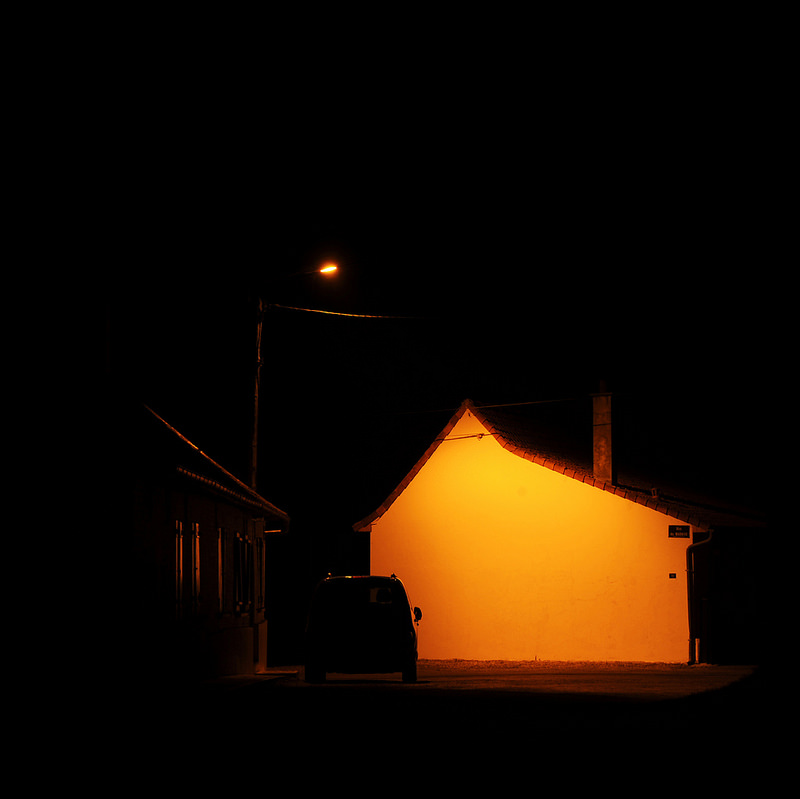

In [36]:
img

In [63]:
#resizing image
img=img.resize((256,256),Image.NEAREST)

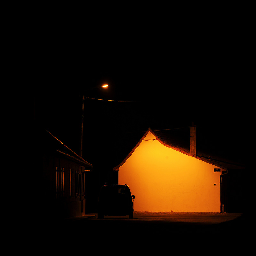

In [64]:
img

In [65]:
#image into arrays

image=keras.preprocessing.image.img_to_array(img)

In [66]:
image.shape

(256, 256, 3)

In [67]:
image=image.astype('float32')/255.0

In [68]:
image.shape

(256, 256, 3)

In [69]:
image=np.expand_dims(image,axis=0)

In [70]:
image.shape

(1, 256, 256, 3)

In [71]:
#creating enhanced image--model inference to enhance the low light image

output=model.predict(image)

1/1 [==============================] - 17s 17s/step


In [72]:
output

array([[[[0.1479407 , 0.14532827, 0.12405188],
         [0.18945654, 0.1836922 , 0.17189859],
         [0.17242596, 0.19897652, 0.168743  ],
         ...,
         [0.16965033, 0.19961332, 0.15889214],
         [0.17214714, 0.18665145, 0.15241973],
         [0.12362949, 0.12755029, 0.12685321]],

        [[0.16881366, 0.14345612, 0.16736291],
         [0.23324588, 0.17590296, 0.19180615],
         [0.19804868, 0.17560779, 0.15640776],
         ...,
         [0.18024719, 0.17910638, 0.13671862],
         [0.19882074, 0.1918477 , 0.1624967 ],
         [0.1676627 , 0.1632483 , 0.15299894]],

        [[0.16204275, 0.1219843 , 0.14061417],
         [0.22284843, 0.15654244, 0.1516353 ],
         [0.17272991, 0.13557178, 0.11323033],
         ...,
         [0.14936818, 0.12885047, 0.11318062],
         [0.17712106, 0.14959696, 0.15606292],
         [0.16339011, 0.15907878, 0.15856887]],

        ...,

        [[0.16301575, 0.15886438, 0.12725668],
         [0.22446446, 0.18454094, 0.13298394]

In [73]:
output_image=output[0]*255.0

In [74]:
output_image.shape

(256, 256, 3)

In [75]:
output_image=output_image.clip(0,255)

In [76]:
output_image=output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [77]:
output_image

array([[[37.724876, 37.05871 , 31.633228],
        [48.311417, 46.84151 , 43.83414 ],
        [43.96862 , 50.739014, 43.029465],
        ...,
        [43.260834, 50.901398, 40.517494],
        [43.897522, 47.59612 , 38.86703 ],
        [31.52552 , 32.525322, 32.34757 ]],

       [[43.047485, 36.58131 , 42.677544],
        [59.4777  , 44.855255, 48.91057 ],
        [50.502415, 44.779984, 39.88398 ],
        ...,
        [45.96303 , 45.672127, 34.863247],
        [50.699287, 48.92116 , 41.436657],
        [42.753986, 41.628315, 39.01473 ]],

       [[41.3209  , 31.105995, 35.856613],
        [56.82635 , 39.91832 , 38.667004],
        [44.046127, 34.570805, 28.873735],
        ...,
        [38.088886, 32.856873, 28.86106 ],
        [45.16587 , 38.147224, 39.796043],
        [41.66448 , 40.565086, 40.435062]],

       ...,

       [[41.569016, 40.510418, 32.45045 ],
        [57.238438, 47.05794 , 33.910904],
        [48.28082 , 41.272053, 26.492743],
        ...,
        [43.84471 , 31.569

In [78]:
output_image=np.uint32(output_image)

In [79]:
output_image

array([[[37, 37, 31],
        [48, 46, 43],
        [43, 50, 43],
        ...,
        [43, 50, 40],
        [43, 47, 38],
        [31, 32, 32]],

       [[43, 36, 42],
        [59, 44, 48],
        [50, 44, 39],
        ...,
        [45, 45, 34],
        [50, 48, 41],
        [42, 41, 39]],

       [[41, 31, 35],
        [56, 39, 38],
        [44, 34, 28],
        ...,
        [38, 32, 28],
        [45, 38, 39],
        [41, 40, 40]],

       ...,

       [[41, 40, 32],
        [57, 47, 33],
        [48, 41, 26],
        ...,
        [43, 31, 26],
        [46, 35, 37],
        [43, 37, 42]],

       [[42, 40, 36],
        [63, 54, 40],
        [57, 51, 36],
        ...,
        [55, 41, 34],
        [53, 43, 44],
        [43, 41, 46]],

       [[36, 29, 30],
        [51, 43, 33],
        [51, 41, 31],
        ...,
        [43, 37, 29],
        [38, 37, 37],
        [33, 35, 28]]], dtype=uint32)

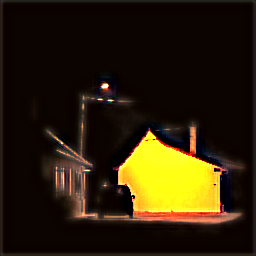

In [80]:
Image.fromarray(output_image.astype('uint8'),'RGB')